# CM50266 Applied Data Science
## Case Study 2 – Electric Vehicle Support Infrastructure


In [1]:
# Importing the libraries used
import pandas as pd
import csv
import datetime
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib inline
import matplotlib.pyplot as plt

## Reading the dataset 

"Regional traffic" dataset downloaded from https://roadtraffic.dft.gov.uk/downloads . It provides the total traffic volume across each region for the whole year. After downloading it make sure it has the appropriate naming 'region_traffic.csv'.

In [2]:
dataset = pd.read_csv ('region_traffic.csv')

In [3]:
dataset.head(7)

,year,region_id,region_name,road_category_id,road_category_name,road_category_description,total_link_length_km,total_link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
0,2019,1,South West,4,PA,Class A Principal road,4253.7,2643.13,5.435658e+07,1.061510e+08,8.525295e+09,6.718390e+07,1.601047e+09,3.836536e+08,1.068333e+10
1,2019,5,North West,4,PA,Class A Principal road,3793.0,2356.86,6.273163e+07,7.224395e+07,9.158519e+09,9.010205e+07,1.452720e+09,3.944172e+08,1.116800e+10
2,2019,3,Scotland,3,TA,Class A Trunk road,2952.5,1834.60,4.618189e+06,5.055147e+07,5.002907e+09,5.497848e+07,1.090808e+09,5.340358e+08,6.733280e+09
3,2019,10,West Midlands,2,PM,M or Class A Principal Motorway,3.8,2.36,0.000000e+00,2.447062e+05,6.610085e+07,5.540045e+05,9.836292e+06,3.804494e+06,8.054034e+07
4,2019,6,London,3,TA,Class A Trunk road,1.6,0.99,1.722875e+04,1.087472e+05,9.981850e+06,5.335774e+04,1.933932e+06,1.051267e+06,1.312915e+07
5,2019,6,London,1,TM,M or Class A Trunk Motorway,60.3,37.47,0.000000e+00,9.650570e+06,1.151238e+09,7.972349e+06,2.627335e+08,1.765982e+08,1.608193e+09
6,2019,5,North West,3,TA,Class A Trunk road,299.6,186.16,1.328652e+06,9.379494e+06,1.236229e+09,6.077212e+06,2.413654e+08,1.208397e+08,1.613891e+09


In [4]:
dataset.describe()

,year,region_id,road_category_id,total_link_length_km,total_link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
count,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1.645000e+03,1.645000e+03,1.645000e+03,1.645000e+03,1.645000e+03,1.645000e+03,1.645000e+03
mean,2006.221277,6.159878,3.617021,6436.125958,3999.223100,4.676081e+07,4.757339e+07,3.988264e+09,4.949178e+07,6.432011e+08,2.774758e+08,5.006006e+09
std,7.879856,3.184603,1.725140,11138.147220,6920.923798,8.415086e+07,4.994212e+07,3.012303e+09,4.721521e+07,4.921376e+08,2.929667e+08,3.713713e+09
min,1993.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1999.000000,3.000000,2.000000,363.590000,225.920000,0.000000e+00,1.405963e+07,1.682382e+09,1.601010e+07,2.807245e+08,6.413354e+07,2.157976e+09
50%,2006.000000,6.000000,4.000000,1719.000000,1068.140000,1.127659e+07,3.024423e+07,3.327606e+09,2.973515e+07,5.353150e+08,1.610706e+08,4.187137e+09
75%,2013.000000,9.000000,5.000000,3693.820000,2295.230000,3.945596e+07,6.598154e+07,5.946412e+09,8.154567e+07,9.459136e+08,4.094198e+08,7.493435e+09
max,2019.000000,11.000000,6.000000,41795.090000,25970.260000,4.665928e+08,3.264047e+08,1.318414e+10,2.687437e+08,2.502388e+09,1.386260e+09,1.590494e+10


## Filtering data to only include entires from 2000 to 2019 and checking for any null values in the dataset

In [5]:
dataset = dataset.loc[dataset['year'] >= 2000]

# Checking for null values
print(dataset[dataset.isna().any(axis=1)])

Empty DataFrame
Columns: [year, region_id, region_name, road_category_id, road_category_name, road_category_description, total_link_length_km, total_link_length_miles, pedal_cycles, two_wheeled_motor_vehicles, cars_and_taxis, buses_and_coaches, lgvs, all_hgvs, all_motor_vehicles]
Index: []


## Annual millage per region and vehicle type

In [6]:
annual_millage_region_vehicle_df = dataset.groupby(['year','region_name']).sum()
if 'region_id' in annual_millage_region_vehicle_df.columns:
    del annual_millage_region_vehicle_df['region_id']
    del annual_millage_region_vehicle_df['road_category_id']
    del annual_millage_region_vehicle_df['total_link_length_km']
    del annual_millage_region_vehicle_df['total_link_length_miles']
annual_millage_region_vehicle_df.reset_index(inplace=True)
# Calculating millage for billions as the values are too large
annual_millage_region_vehicle_df[annual_millage_region_vehicle_df.columns.tolist()[2:]] = annual_millage_region_vehicle_df[annual_millage_region_vehicle_df.columns.tolist()[2:]] / 1000000000
annual_millage_region_vehicle_df

,year,region_name,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
0,2000,East Midlands,0.209387,0.204839,18.277014,0.202097,2.637438,1.965540,23.286928
1,2000,East of England,0.382818,0.330687,25.563696,0.295678,3.791534,2.065401,32.046996
2,2000,London,0.281822,0.441184,16.459260,0.318921,2.231814,0.696619,20.147798
3,2000,North East,0.089576,0.073554,9.344539,0.191077,1.209167,0.527882,11.346220
4,2000,North West,0.258356,0.244444,26.432372,0.363608,3.415748,2.118728,32.574900
...,...,...,...,...,...,...,...,...,...
215,2019,South East,0.572699,0.481231,45.571087,0.284530,8.863099,2.465793,57.665740
216,2019,South West,0.372976,0.333512,28.451144,0.221370,5.597530,1.470846,36.074402
217,2019,Wales,0.120758,0.157879,15.617190,0.133383,3.325162,0.719938,19.953552
218,2019,West Midlands,0.219699,0.183424,26.849283,0.171053,5.043574,2.012024,34.259357


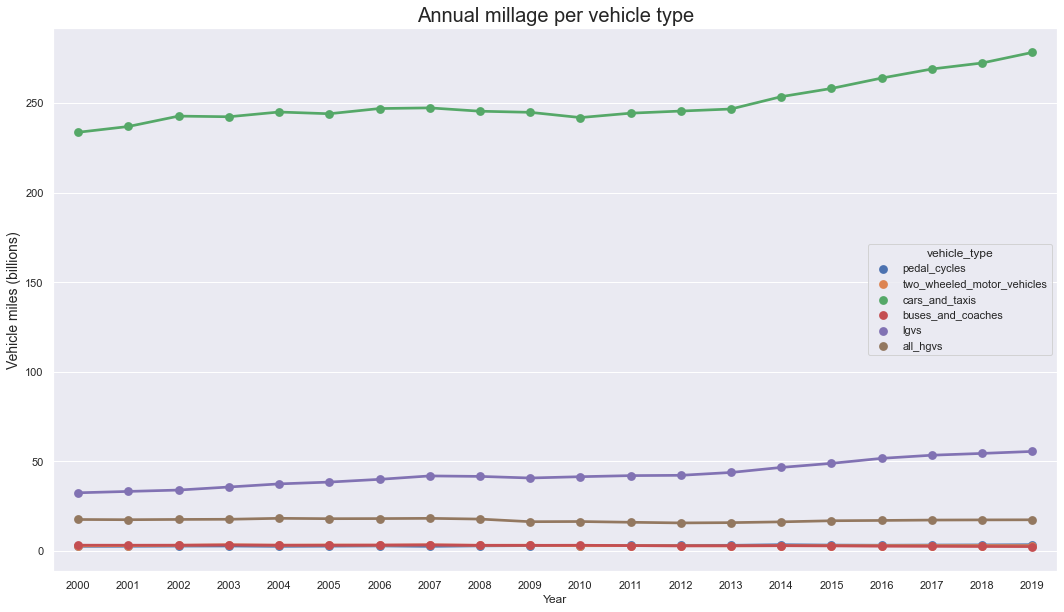

In [7]:
annual_millage_vehicle_df = annual_millage_region_vehicle_df.groupby(['year']).sum()
annual_millage_vehicle_df = annual_millage_vehicle_df.loc[:,annual_millage_vehicle_df.columns!="all_motor_vehicles"]
annual_millage_vehicle_df.reset_index(inplace=True)
annual_millage_vehicle_df = annual_millage_vehicle_df.rename(columns = {'index':'year'})

df_melted = annual_millage_vehicle_df.melt("year",var_name="vehicle_type")

plt.figure(figsize=(18,10))
ax = sns.pointplot(x='year', y='value', data=df_melted, hue="vehicle_type")
plt.xlabel('Year')
plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Annual millage per vehicle type', fontsize=20)
plt.show()

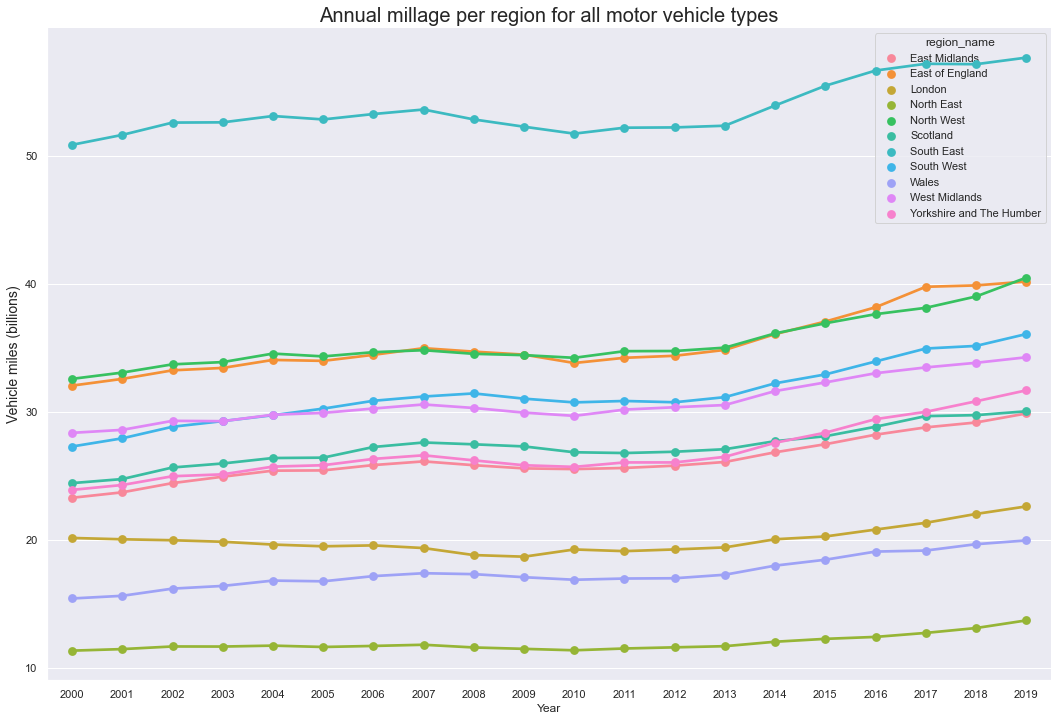

In [8]:
plt.figure(figsize=(18,12))
ax = sns.pointplot(x='year', y='all_motor_vehicles', data=annual_millage_region_vehicle_df, hue="region_name")
plt.xlabel('Year')
plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Annual millage per region for all motor vehicle types', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

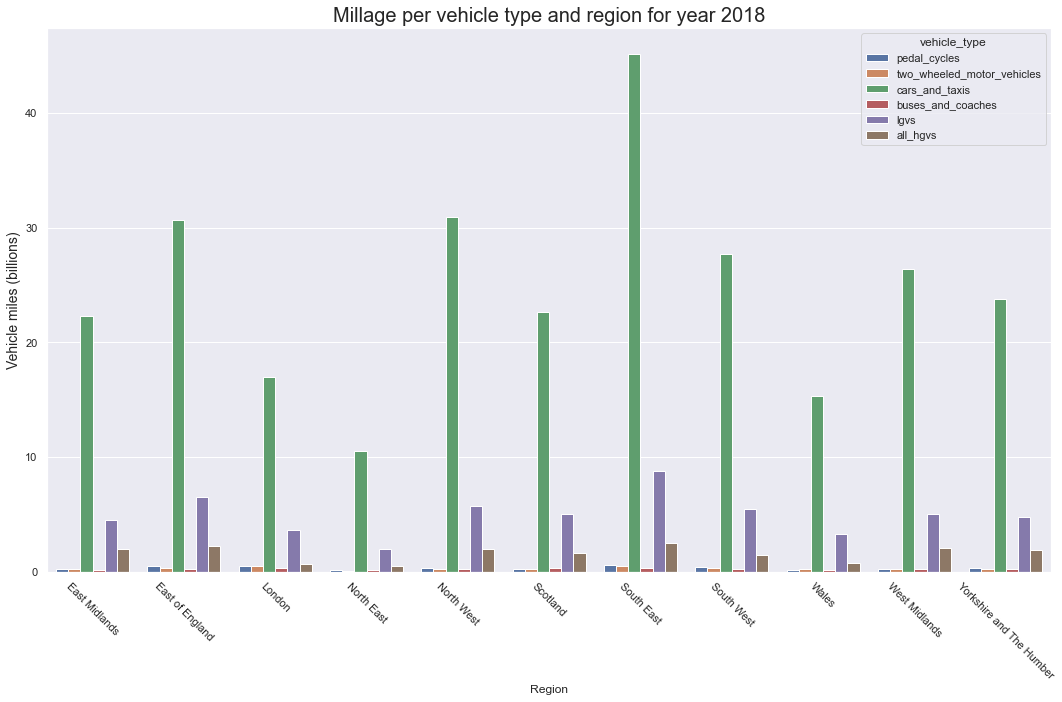

In [9]:
millage_region_vehicle_2018_df = annual_millage_region_vehicle_df.loc[annual_millage_region_vehicle_df['year'] == 2018]
millage_region_vehicle_2018_df = millage_region_vehicle_2018_df.groupby(['region_name']).sum()
millage_region_vehicle_2018_df.reset_index(inplace=True)
millage_region_vehicle_2018_df = millage_region_vehicle_2018_df.loc[:,millage_region_vehicle_2018_df.columns!="all_motor_vehicles"]
millage_region_vehicle_2018_df = millage_region_vehicle_2018_df.loc[:,millage_region_vehicle_2018_df.columns!="year"]

millage_region_vehicle_2018_df = millage_region_vehicle_2018_df.rename(columns = {'index':'region_name'})
df_melted = millage_region_vehicle_2018_df.melt("region_name",var_name="vehicle_type")

plt.figure(figsize=(18,10))
ax = sns.barplot(x='region_name', y='value', data=df_melted, hue="vehicle_type")
plt.xlabel('Region')
plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Millage per vehicle type and region for year 2018', fontsize=20)
plt.xticks(rotation=-45)
plt.show()

## Annual millage for all motor vehicles

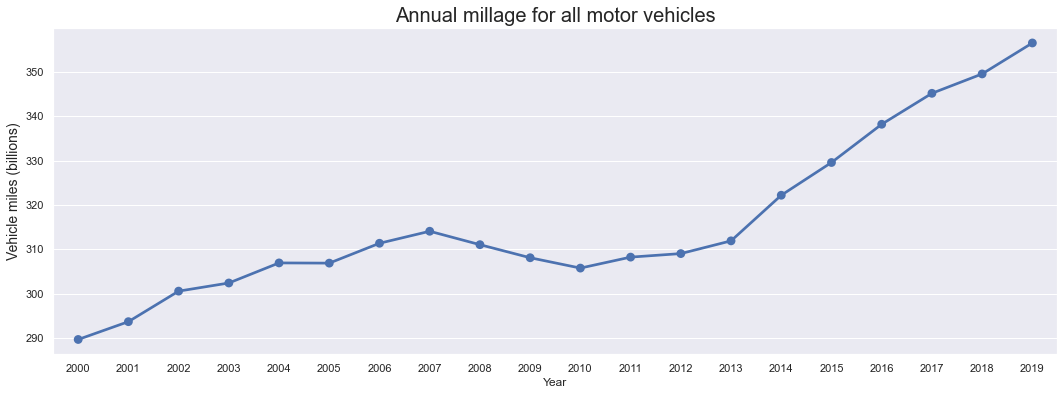

In [10]:
annual_millage_df = annual_millage_region_vehicle_df.groupby(['year']).sum()
annual_millage_df = annual_millage_df.loc[:,annual_millage_df.columns=="all_motor_vehicles"]
annual_millage_df.reset_index(inplace=True)

plt.figure(figsize=(18,6))
ax = sns.pointplot(x='year', y='all_motor_vehicles', data=annual_millage_df)
plt.xlabel('Year')
plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Annual millage for all motor vehicles', fontsize=20)
plt.show()

# Time series forecasting (ARIMA)

You will have to install other dependencies to run it again!

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [12]:
train_df = annual_millage_df.copy()
train_df['year'] =  pd.to_datetime(train_df['year'],format='%Y')
train_df.index = train_df.year
if 'year' in train_df.columns:
    del train_df['year']
train_df

,all_motor_vehicles
year,
2000-01-01,289.663240
2001-01-01,293.678493
2002-01-01,300.563445
2003-01-01,302.399441
2004-01-01,306.924888
2005-01-01,306.877637
2006-01-01,311.357911
2007-01-01,314.065206
2008-01-01,311.037512


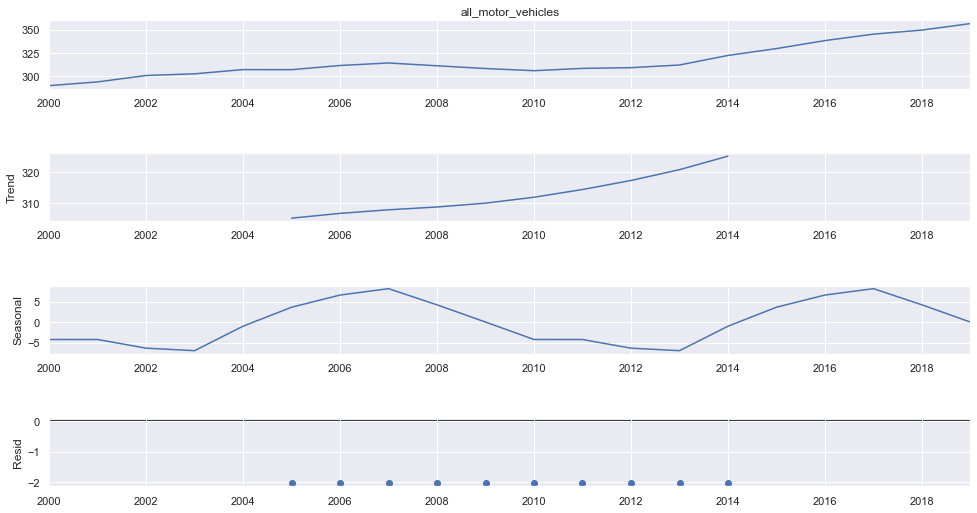

In [13]:
res = sm.tsa.seasonal_decompose(train_df.all_motor_vehicles,period=10)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


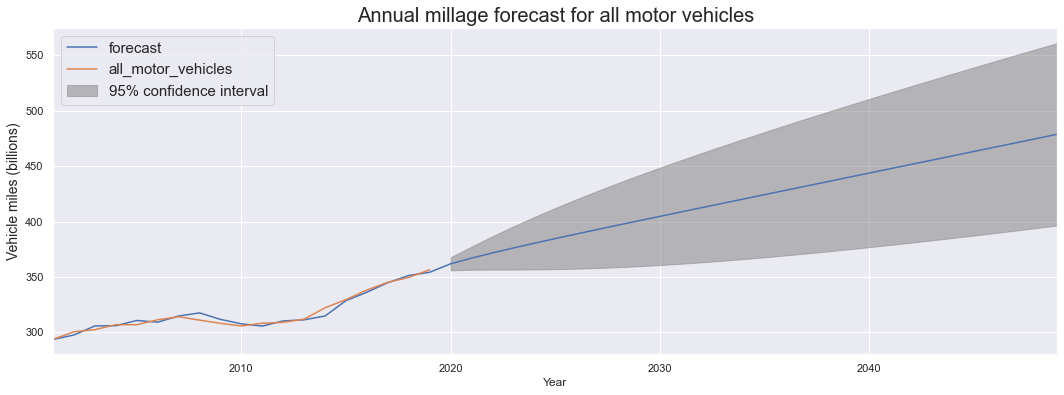

In [14]:
model = ARIMA(train_df, order=(2,1,0), freq=train_df.index.inferred_freq)
results_ARIMA = model.fit(disp=-1)

fig = results_ARIMA.plot_predict(1,49)
fig.set_figheight(6)
fig.set_figwidth(18)
plt.xlabel('Year')
plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Annual millage forecast for all motor vehicles', fontsize=20)
plt.legend(loc='upper left', prop={'size':15})
plt.show()

# Just a Depreciation error

In [15]:
millage_regression_results = results_ARIMA.forecast(steps=30)
millage_regression_mean_results = millage_regression_results[0]
millage_regression_mean_results

array([361.85340244, 366.96154236, 371.65940144, 376.13494053,
       380.43560131, 384.61769544, 388.71483437, 392.75237569,
       396.74777177, 400.713455  , 404.65816609, 408.58808098,
       412.50755516, 416.41966247, 420.32657167, 424.22981308,
       428.13046648, 432.02929378, 435.92683258, 439.82346221,
       443.71945033, 447.6149858 , 451.51020187, 455.40519258,
       459.30002427, 463.19474375, 467.08938407, 470.98396852,
       474.87851356, 478.77303078])

In [16]:
# The data used from this file cannot be downloaded from another source
# It was recreated from a figure to be used in the further calculations
electric_percent_data = pd.read_csv ('electric_percent.csv')
electric_percent_data['electic_percent'] = np.round(np.abs(electric_percent_data['electic_percent'] - 100), 3)
electric_percent_data.to_csv('electric_percent_inversed.csv', index=False)


In [17]:
total_millage = np.concatenate((train_df.values[15:].ravel(), millage_regression_mean_results))
years = np.arange(2015,2050)
electric_millage = total_millage * electric_percent_data['electic_percent'].values / 100
electric_millage_driven_df = pd.DataFrame(data = {'year': years, 'total_millage': total_millage, 'electric_millage': electric_millage})

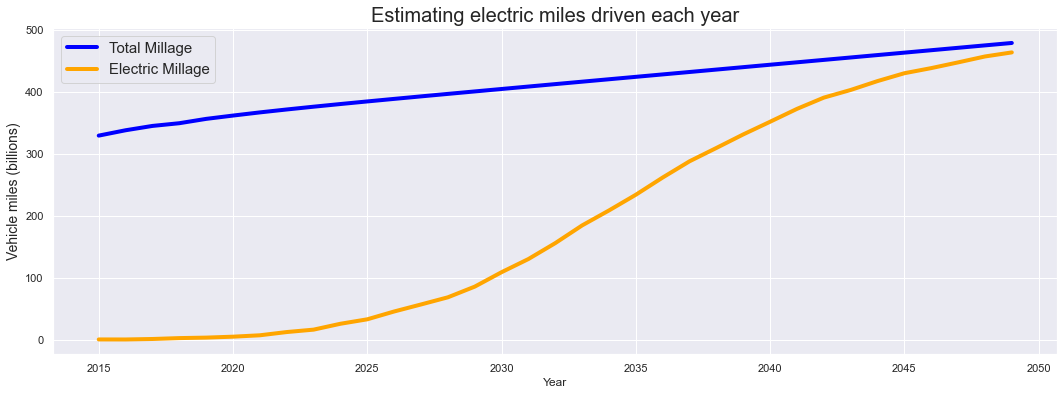

In [18]:
plt.figure(figsize=(18,6))

plt.plot(electric_millage_driven_df['year'],electric_millage_driven_df['total_millage'], color='blue', linewidth=4.0, label='Total Millage')
plt.plot(electric_millage_driven_df['year'],electric_millage_driven_df['electric_millage'], color='orange', linewidth=4.0, label='Electric Millage')

plt.xlabel('Year')
plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Estimating electric miles driven each year', fontsize=20)

plt.legend(loc='upper left', prop={'size':15})
plt.show()

Average consumption of an electic vehicle is 307 Wh/mi https://ev-database.uk/cheatsheet/energy-consumption-electric-car
Multiplying 307 with the electric miles that we have forecasted we can see the expected power consumption (Wh) that will be needed for these vehicles.

In [19]:
electric_power_consumption_TWh = electric_millage_driven_df['electric_millage'] * 306 / 10**3
electric_power_consumption_TWh.values

array([  0.40339099,   0.38703833,   0.62527918,   1.06638063,
         1.30477368,   1.76166882,   2.45017286,   4.0464343 ,
         5.23232289,   8.12914032,  10.32520819,  14.17845133,
        17.63674181,  21.16085981,  26.421795  ,  33.53810927,
        40.03019964,  47.87044576,  56.59937742,  63.97040885,
        71.71462449,  80.19912007,  88.19655105,  94.76815684,
       101.44149028, 107.68700997, 114.02357045, 119.56964504,
       123.3491833 , 127.72240796, 131.59484953, 134.11632771,
       136.93233418, 139.84906292, 141.85156299])

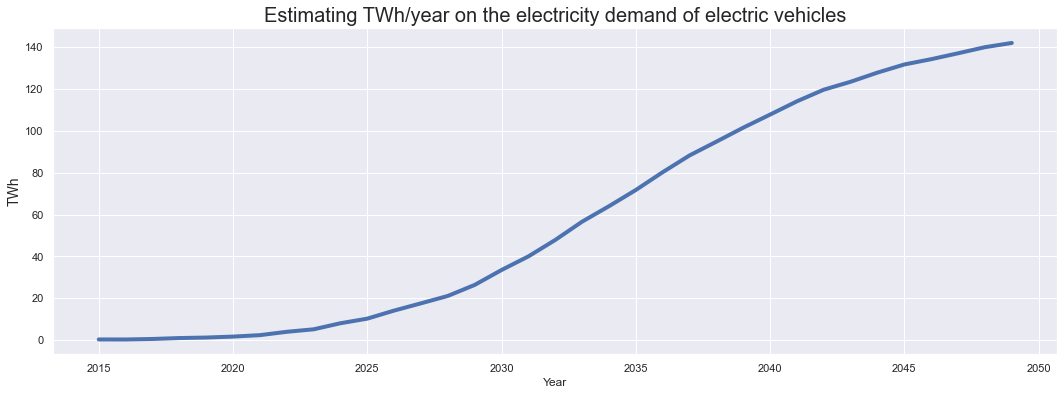

In [20]:
plt.figure(figsize=(18,6))
plt.plot(years, electric_power_consumption_TWh.values, linewidth=4.0, color='b')

plt.xlabel('Year')
plt.ylabel('TWh', fontsize=14)
plt.title('Estimating TWh/year on the electricity demand of electric vehicles', fontsize=20)

plt.show()

Generalizing UK's electrical supply, validated from multiple sources https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/904805/DUKES_2020_Chapter_5.pdf it is around 325TWh per yea, with some spikes around 2005 but it has now dropped to a more average value.

The UK tries to match the production with the demand at around 5TWh.

The additional generation capacity that would be needed for the increasing use of these electric vehicles can be found by comparing the demand with this 5TWh surplus that they had over the years. Assuming that this would also continue for the following years.

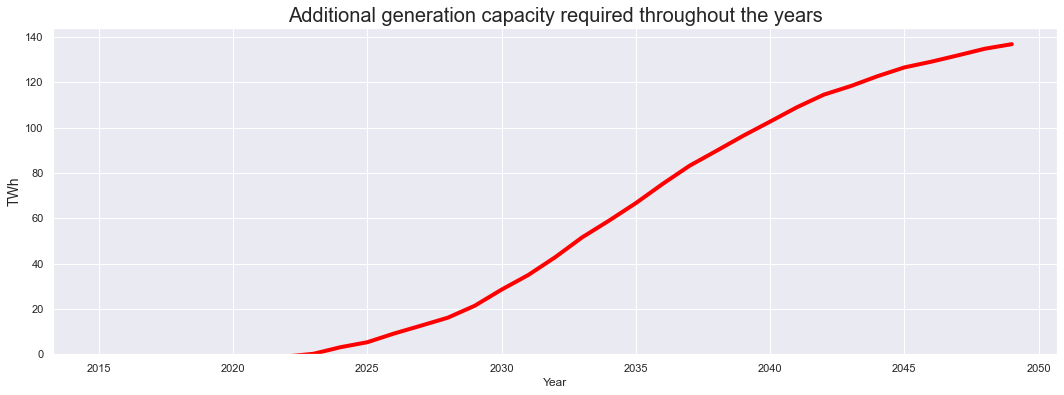

In [21]:
plt.figure(figsize=(18,6))

# The margin amount
energy_margin = 5
plt.plot(years, electric_power_consumption_TWh.values - energy_margin, linewidth=4.0, color='red')

plt.xlabel('Year')
plt.ylabel('TWh', fontsize=14)
plt.title('Additional generation capacity required throughout the years', fontsize=20)
plt.ylim(0)

plt.show()

# Recomendation

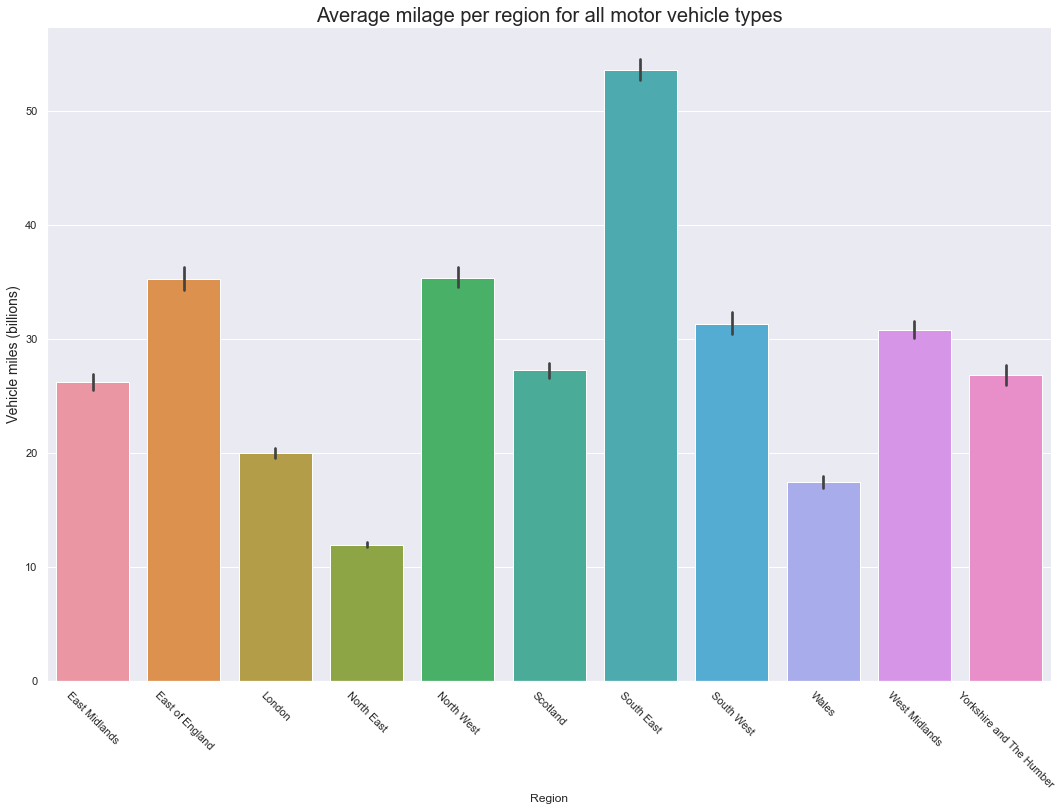

In [22]:
plt.figure(figsize=(18,12))
ax = sns.barplot(x='region_name', y='all_motor_vehicles', data=annual_millage_region_vehicle_df)

plt.xlabel('Region')
plt.xticks(rotation=-45)

plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Average milage per region for all motor vehicle types', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [23]:
## Find mean millage per region to calculate ratios
## Calculate millage ratios
## Using additional generation required for year 2040 split between rations
## Showing additional generation required per region (TWh per region)

avg_millage_region_all = annual_millage_region_vehicle_df.groupby(['region_name']).mean()
## Calculating rations
avg_millage_region_all['millage_ratio'] = (avg_millage_region_all['all_motor_vehicles'] 
                                              / avg_millage_region_all['all_motor_vehicles'].sum())

## Additional generation required capacity at year 2040 is 103.03892831
avg_millage_region_all['additional_power_2040'] = avg_millage_region_all['millage_ratio'] * 103.03892831 * 1000000
avg_millage_region_all

,year,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,millage_ratio,additional_power_2040
region_name,,,,,,,,,,
East Midlands,2009.5,0.242921,0.225366,20.287598,0.195537,3.553697,1.935075,26.197272,0.082893,8.541201e+06
East of England,2009.5,0.438507,0.337675,27.638601,0.268687,4.993237,2.075290,35.313490,0.111738,1.151340e+07
London,2009.5,0.358042,0.474717,15.815330,0.351133,2.693237,0.649412,19.983829,0.063232,6.515407e+06
North East,2009.5,0.090294,0.077833,9.650015,0.170787,1.554935,0.476179,11.929750,0.037748,3.889504e+06
North West,2009.5,0.279789,0.253339,28.296546,0.314823,4.478744,2.034000,35.377452,0.111941,1.153425e+07
Scotland,2009.5,0.177868,0.186909,21.236185,0.372824,3.860241,1.589013,27.245172,0.086209,8.882852e+06
South East,2009.5,0.496421,0.522592,43.219407,0.356300,7.041253,2.467995,53.607545,0.169624,1.747788e+07
South West,2009.5,0.292739,0.379094,24.959521,0.262153,4.279978,1.447849,31.328595,0.099129,1.021419e+07
Wales,2009.5,0.095297,0.150850,13.898083,0.162760,2.478389,0.741255,17.431336,0.055156,5.683208e+06


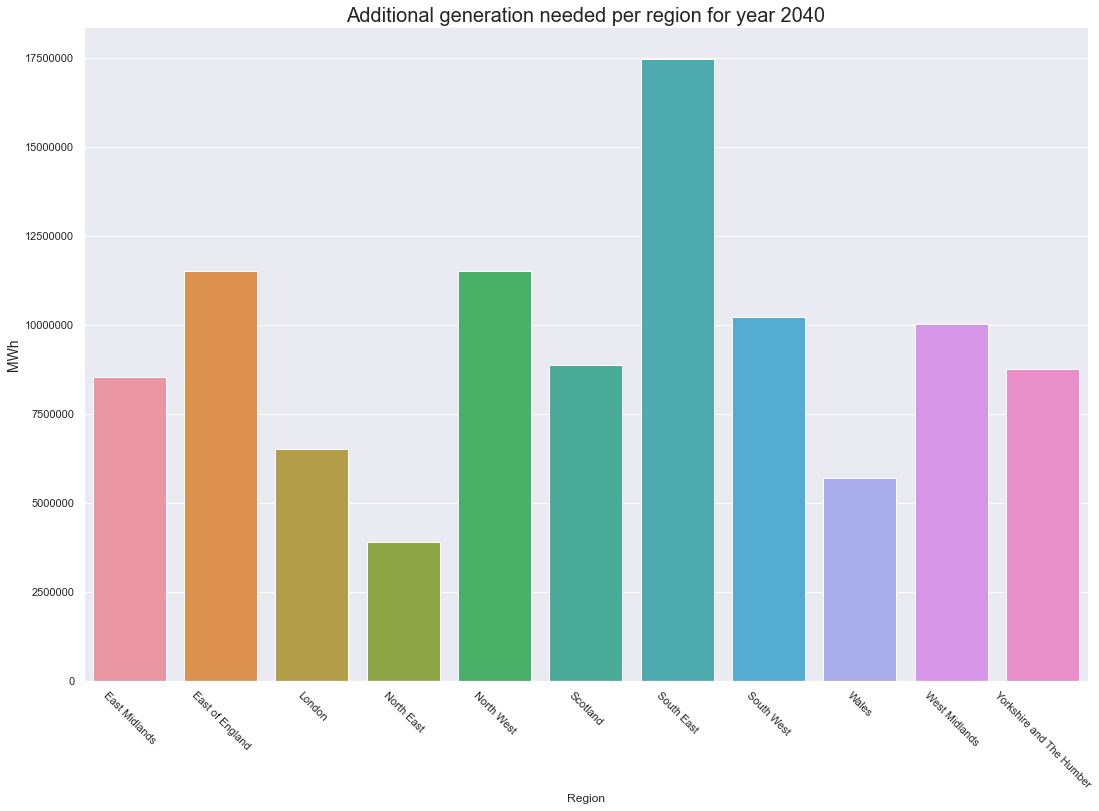

In [24]:
plt.figure(figsize=(18,12))
ax = sns.barplot(x=avg_millage_region_all.index, y='additional_power_2040', data=avg_millage_region_all)

plt.xlabel('Region')
plt.xticks(rotation=-45)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('MWh', fontsize=14)
plt.title('Additional generation needed per region for year 2040', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

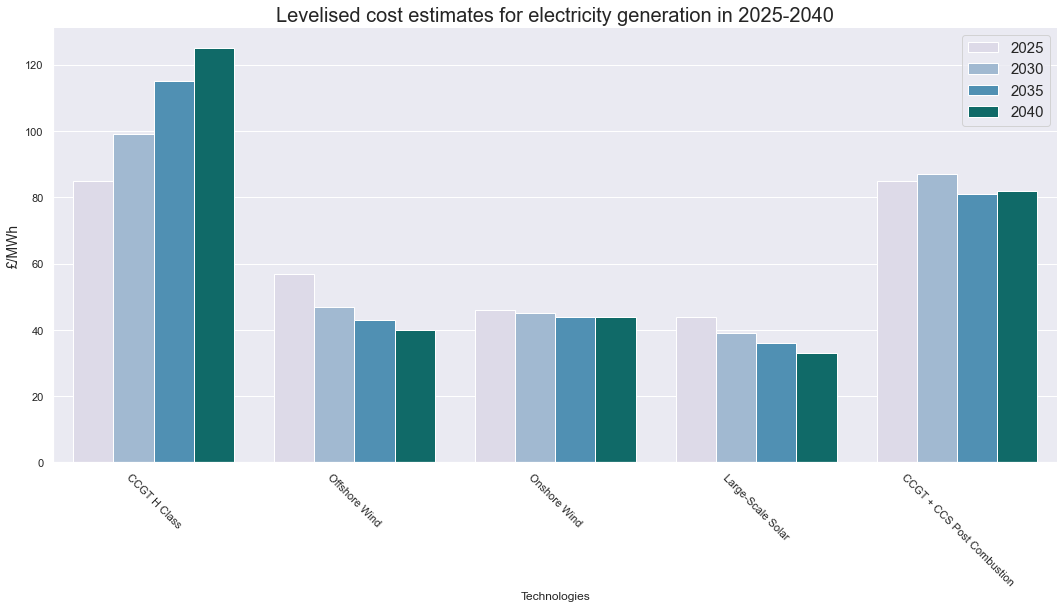

In [25]:
# The data used from this file cannot be downloaded from another source
# It was recreated using Table 4.17 (p.35) from BEIS Levelised Cost Estimates
# https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/911817/electricity-generation-cost-report-2020.pdf
technology_costs = pd.read_csv('beis_levelised_costs.csv')

plt.figure(figsize=(18,8))
ax = sns.barplot(x='technology', y='pound_per_mwh', data=technology_costs, hue="year", palette='PuBuGn')
plt.xlabel('Technologies')
plt.ylabel('£/MWh', fontsize=14)
plt.title('Levelised cost estimates for electricity generation in 2025-2040', fontsize=20)
plt.xticks(rotation=-45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper right', prop={'size':15})
plt.show()

Using BEIS projections for the levelised costs for the electricity generating technologies we can observe that the best one in terms of costs is Large-Scale Solar, with Offshore Wind and Onshore Wind coming in 2nd and 3rd respectively.

My recommendation on covering the additional electricity demand would be to use mostly Large-Scale solar. 

Each region can choose the most suitable electricity generating technology. For example, they cant install OffShore Wind in or near London, thus they have to choose others that would be best in terms of area available and Levelised costs.

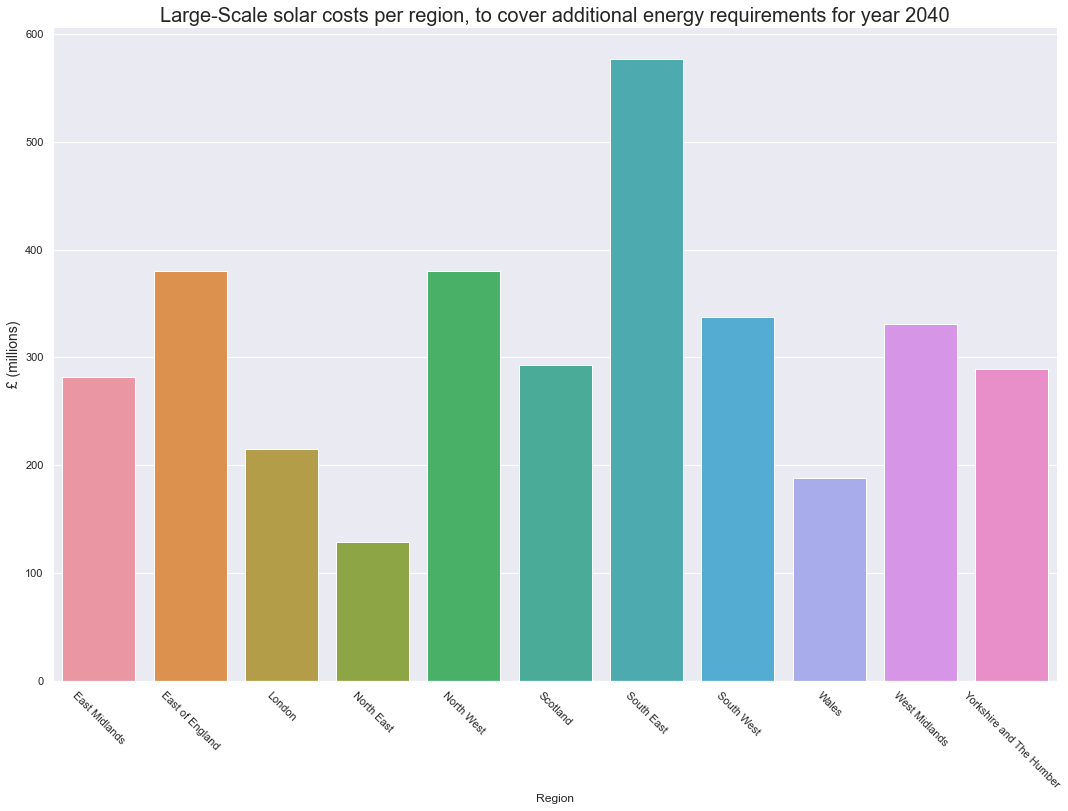

In [26]:
avg_millage_region_all['solar_power_cost_only'] = avg_millage_region_all['additional_power_2040'] * 33 / 1000000

plt.figure(figsize=(18,12))
ax = sns.barplot(x=avg_millage_region_all.index, y='solar_power_cost_only', data=avg_millage_region_all)

plt.xlabel('Region')
plt.xticks(rotation=-45)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('£ (millions)', fontsize=14)
plt.title('Large-Scale solar costs per region, to cover additional energy requirements for year 2040', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Technology amount on recomendation

- 35% OffShore Wind
- 25% Onshore Wind
- 25% CCGT + CCS Post Combustion
- 15% Large-Scale Solar

In [27]:
recomendation_costs = avg_millage_region_all[['additional_power_2040']].copy()

recomendation_costs['offshore_wind_costs'] = recomendation_costs['additional_power_2040'] * 40 * 0.35 / 1000000
recomendation_costs['onshore_wind_costs'] = recomendation_costs['additional_power_2040'] * 44 * 0.25 / 1000000
recomendation_costs['CCGT_CCS_costs'] = recomendation_costs['additional_power_2040'] * 33 * 0.25 / 1000000
recomendation_costs['solar_costs'] = recomendation_costs['additional_power_2040'] * 33 * 0.15 / 1000000

recomendation_costs = recomendation_costs.loc[:,recomendation_costs.columns!="additional_power_2040"]
recomendation_costs.reset_index(inplace=True)

recomendation_costs = recomendation_costs.rename(columns = {'index':'region_name'})
df_melted = recomendation_costs.melt("region_name", var_name="tech_cost")

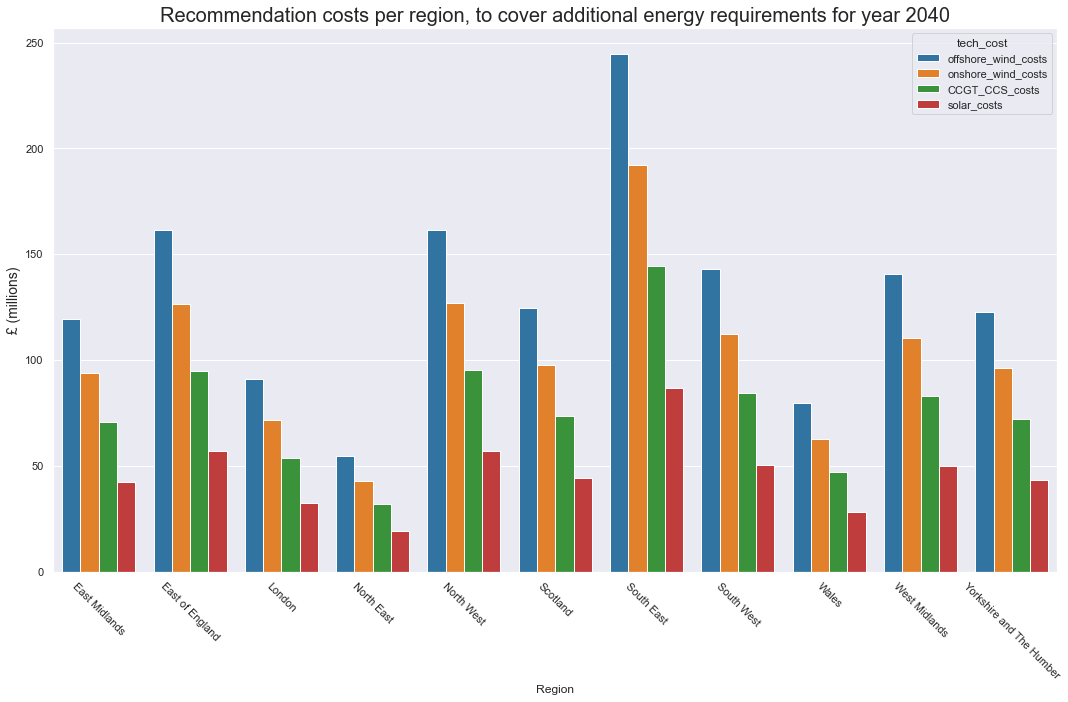

In [28]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x='region_name', y='value', data=df_melted, hue="tech_cost", palette='tab10')
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Region')
plt.ylabel('£ (millions)', fontsize=14)
plt.title('Recommendation costs per region, to cover additional energy requirements for year 2040', fontsize=20)
plt.xticks(rotation=-45)
plt.show()